In [1]:
import numpy as np
import pandas as pd
import os
import sys

from IPython.display import display
from scipy.stats import pearsonr
from scipy.cluster import hierarchy as hac

from random import randint
from scipy.stats import halfnorm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
object_arr = np.arange(0,763)
num_obj = len(object_arr)

fac = 10.

In [3]:
''' LOAD FROM FILES IF NOT CALCULATED BEFORE '''

corr_matrix_cc = np.loadtxt('xobject_corr_matrix_cc.dat')
corr_diff_matrix_cc = np.loadtxt('xobject_corr_diff_matrix_cc.dat')
# dist_matrix_cc = np.loadtxt('xobject_dist_matrix_cc.dat')
# dist_tr_matrix_cc = np.loadtxt('xobject_dist_tr_matrix_cc.dat')

corr_matrix_cc_med = np.loadtxt('xobject_corr_matrix_cc_med.dat')
corr_diff_matrix_cc_med = np.loadtxt('xobject_corr_diff_matrix_cc_med.dat')
# dist_matrix_cc_med = np.loadtxt('xobject_dist_matrix_cc.dat')
# dist_tr_matrix_cc_med = np.loadtxt('xobject_dist_tr_matrix_cc.dat')

''' LOAD FROM FILES IF NOT CALCULATED BEFORE '''
corr_matrix_acg = np.loadtxt('xobject_corr_matrix_acg.dat')
corr_diff_matrix_acg = np.loadtxt('xobject_corr_diff_matrix_acg.dat')
# dist_matrix_acg = np.loadtxt('xobject_dist_matrix_acg.dat')
# dist_tr_matrix_acg = np.loadtxt('xobject_dist_tr_matrix_acg.dat')

''' LOAD FROM FILES IF NOT CALCULATED BEFORE '''
corr_matrix_aco = np.loadtxt('xobject_corr_matrix_aco.dat')
corr_diff_matrix_aco = np.loadtxt('xobject_corr_diff_matrix_aco.dat')
# dist_matrix_aco = np.loadtxt('xobject_dist_matrix_aco.dat')
# dist_tr_matrix_aco = np.loadtxt('xobject_dist_tr_matrix_aco.dat')

In [4]:
''' create linkage vector for CC'''
obj_analyze = np.loadtxt('objects_to_analyze_reduced_complete_vHC.dat').astype(np.int)
num_analyze = len(obj_analyze)

# dist_corr_matrix = np.zeros(corr_matrix_cc.shape)
# dist_corr_diff_matrix = np.zeros(corr_matrix_cc.shape)

# dist_corr_matrix.fill(np.nan)
# dist_corr_diff_matrix.fill(np.nan)
# for ii in range(0,corr_matrix_cc.shape[0]):
# 	dist_corr_matrix[ii] = 1- corr_matrix_cc[ii]/corr_matrix_cc[ii,ii]
# 	dist_corr_diff_matrix[ii] = 1- corr_diff_matrix_cc[ii]/corr_diff_matrix_cc[ii,ii]

dist_corr_matrix = 1 - corr_matrix_cc
dist_corr_diff_matrix = 1 - corr_diff_matrix_cc
dist_corr_tr_matrix = np.arctan(fac) - np.arctan(fac*corr_matrix_cc)

c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

dist_corr_matrix_med = 1 - corr_matrix_cc_med
dist_corr_diff_matrix_med = 1 - corr_diff_matrix_cc_med
dist_corr_tr_matrix_med = np.arctan(fac) - np.arctan(fac*corr_matrix_cc_med)

c_corr_matrix_med = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_tr_matrix_med = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_diff_matrix_med = np.zeros(int(num_analyze*(num_analyze-1)/2))

index = 0
for ii in range(0,num_obj):
	if np.any(obj_analyze == ii):
		for jj in range(ii+1,num_obj):
			if np.any(obj_analyze == jj):
				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
				c_corr_tr_matrix[index] = dist_corr_tr_matrix[ii,jj]
				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
# 				c_dist_matrix[index] = dist_matrix_cc[ii,jj]
# 				c_dist_tr_matrix[index] = dist_tr_matrix_cc[ii,jj]
				
				c_corr_matrix_med[index] = dist_corr_matrix_med[ii,jj]
				c_corr_tr_matrix_med[index] = dist_corr_tr_matrix_med[ii,jj]
				c_corr_diff_matrix_med[index] = dist_corr_diff_matrix_med[ii,jj]
	
				index+= 1 

'''normalize things'''
# c_corr_matrix/= np.std(c_corr_matrix)
# c_corr_tr_matrix/= np.std(c_corr_tr_matrix)
# c_corr_diff_matrix/= np.std(c_corr_diff_matrix)
# c_dist_matrix/= np.std(c_dist_matrix)
# c_dist_tr_matrix/= np.std(c_dist_tr_matrix)

# c_corr_matrix_med/= np.std(c_corr_matrix_med)
# c_corr_tr_matrix_med/= np.std(c_corr_tr_matrix_med)
# c_corr_diff_matrix_med/= np.std(c_corr_diff_matrix_med)

c_corr_matrix_cc = c_corr_matrix
c_corr_tr_matrix_cc = c_corr_tr_matrix
c_corr_diff_matrix_cc = c_corr_diff_matrix
# c_dist_matrix_cc = c_dist_matrix
# c_dist_tr_matrix_cc = c_dist_tr_matrix

c_corr_matrix_cc_med = c_corr_matrix_med
c_corr_tr_matrix_cc_med = c_corr_tr_matrix_med
c_corr_diff_matrix_cc_med = c_corr_diff_matrix_med

In [5]:
''' create linkage vector for ACG'''
# obj_analyze = np.loadtxt('objects_to_analyze.dat')
# num_analyze = len(obj_analyze)

# dist_corr_matrix = np.zeros(corr_matrix_acg.shape)
# dist_corr_diff_matrix = np.zeros(corr_matrix_acg.shape)

# dist_corr_matrix.fill(np.nan)
# dist_corr_diff_matrix.fill(np.nan)
# for ii in range(0,corr_matrix_acg.shape[0]):
# 	dist_corr_matrix[ii] = 1- corr_matrix_acg[ii]/corr_matrix_acg[ii,ii]
# 	dist_corr_diff_matrix[ii] = 1- corr_diff_matrix_acg[ii]/corr_diff_matrix_acg[ii,ii]

dist_corr_matrix = 1 - corr_matrix_acg
dist_corr_diff_matrix = 1 - corr_diff_matrix_acg
dist_corr_tr_matrix = np.arctan(fac) - np.arctan(fac*corr_matrix_acg)

c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

index = 0
for ii in range(0,num_obj):
	if np.any(obj_analyze == ii):
		for jj in range(ii+1,num_obj):
			if np.any(obj_analyze == jj):
				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
				c_corr_tr_matrix[index] = dist_corr_tr_matrix[ii,jj]
				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
# 				c_dist_matrix[index] = dist_matrix_acg[ii,jj]
# 				c_dist_tr_matrix[index] = dist_tr_matrix_acg[ii,jj]
				
				index+= 1 

'''normalize things'''
# c_corr_matrix/= np.std(c_corr_matrix)
# c_corr_tr_matrix/= np.std(c_corr_tr_matrix)
# c_corr_diff_matrix/= np.std(c_corr_diff_matrix)
# c_dist_matrix/= np.std(c_dist_matrix)
# c_dist_tr_matrix/= np.std(c_dist_tr_matrix)

c_corr_matrix_acg = c_corr_matrix
c_corr_tr_matrix_acg = c_corr_tr_matrix
c_corr_diff_matrix_acg = c_corr_diff_matrix
# c_dist_matrix_acg = c_dist_matrix
# c_dist_tr_matrix_acg = c_dist_tr_matrix

In [6]:
''' create linkage vector for ACO'''
# obj_analyze = np.loadtxt('objects_to_analyze.dat')
# num_analyze = len(obj_analyze)

# dist_corr_matrix = np.zeros(corr_matrix_aco.shape)
# dist_corr_diff_matrix = np.zeros(corr_matrix_aco.shape)

# dist_corr_matrix.fill(np.nan)
# dist_corr_diff_matrix.fill(np.nan)
# for ii in range(0,corr_matrix_aco.shape[0]):
# 	dist_corr_matrix[ii] = 1- corr_matrix_aco[ii]/corr_matrix_aco[ii,ii]
# 	dist_corr_diff_matrix[ii] = 1- corr_diff_matrix_aco[ii]/corr_diff_matrix_aco[ii,ii]

dist_corr_matrix = 1 - corr_matrix_aco
dist_corr_diff_matrix = 1 - corr_diff_matrix_aco
dist_corr_tr_matrix = np.arctan(fac) - np.arctan(fac*corr_matrix_aco)

c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

index = 0
for ii in range(0,num_obj):
	if np.any(obj_analyze == ii):
		for jj in range(ii+1,num_obj):
			if np.any(obj_analyze == jj):
				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
				c_corr_tr_matrix[index] = dist_corr_tr_matrix[ii,jj]
				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
# 				c_dist_matrix[index] = dist_matrix_aco[ii,jj]
# 				c_dist_tr_matrix[index] = dist_tr_matrix_aco[ii,jj]
				
				index+= 1 

'''normalize things'''
# c_corr_matrix/= np.std(c_corr_matrix)
# c_corr_tr_matrix/= np.std(c_corr_tr_matrix)
# c_corr_diff_matrix/= np.std(c_corr_diff_matrix)
# c_dist_matrix/= np.std(c_dist_matrix)
# c_dist_tr_matrix/= np.std(c_dist_tr_matrix)

c_corr_matrix_aco = c_corr_matrix
c_corr_tr_matrix_aco = c_corr_tr_matrix
c_corr_diff_matrix_aco = c_corr_diff_matrix
# c_dist_matrix_aco = c_dist_matrix
# c_dist_tr_matrix_aco = c_dist_tr_matrix

In [7]:
font = {'family' : 'serif',
		'weight' : 'normal',
		'size'   : 6}

matplotlib.rc('font', **font)

In [8]:
input_csv = '../../data/fermi_4FGL_associations_ext_GRPHorder+data.csv'
data_in = pd.read_csv(input_csv)
data_in.drop(columns='Unnamed: 0', inplace=True)
DROP_COLUMNS = ['flux', 'flux_err', 'flux_E', 'flux_E_err', 'redshift_flag', 'median_optical_flux', 'num_optical_flux', 'PL_index', 
                'PL_index_err', 'variability_index', 'frac_variability', 'frac_variability_err',]
data_in.drop(columns=DROP_COLUMNS, inplace=True)
data_in = data_in.iloc[:763]

## combine source_types for simplicity
dict_st = {'FSRQ':'F', 'fsrq':'F', 'BCU':'U', 'bcu':'U', 'BLL':'B', 'bll':'B'}
data_in['SOURCE_TYPE'] = data_in['source_type'].map(dict_st)

data_in['synch_peak'] = data_in['synch_peak'].replace(np.nan, '-', regex=True)

In [9]:
obj_labels = []
for ii in range(0,len(obj_analyze)):
	obj_labels+= [str(obj_analyze[ii]).rjust(3,' ')+' '+data_in['SOURCE_TYPE'].iloc[obj_analyze[ii]]+' '+str(data_in['synch_peak'].iloc[obj_analyze[ii]])]
	
print(obj_labels)

['  0 F L', '  8 F L', ' 12 F L', ' 13 F L', ' 23 B H', ' 35 B H', ' 39 F L', ' 45 F L', ' 52 F L', ' 59 B I', ' 63 F I', ' 69 F I', ' 84 B I', ' 90 F L', '103 F L', '116 B L', '119 B H', '152 B H', '160 U I', '174 B I', '187 B L', '190 U L', '200 B I', '219 F L', '261 B I', '272 B H', '280 B H', '290 F I', '317 B H', '337 B H', '363 B H', '368 F -', '428 F L', '448 B H', '457 F I', '458 B L', '478 F I', '480 B I', '489 B L', '509 B H', '564 B I', '623 B L', '642 U -', '736 B H']


[[0.         0.         1.         1.        ]
 [0.10196078 0.         0.89803922 1.        ]
 [0.20392157 0.         0.79607843 1.        ]
 [0.31372549 0.         0.68627451 1.        ]
 [0.41568627 0.         0.58431373 1.        ]
 [0.5254902  0.         0.4745098  1.        ]
 [0.62745098 0.         0.37254902 1.        ]
 [0.7372549  0.         0.2627451  1.        ]
 [0.83921569 0.         0.16078431 1.        ]
 [0.94901961 0.         0.05098039 1.        ]
 [0.94901961 0.05098039 0.         1.        ]
 [0.83921569 0.16078431 0.         1.        ]
 [0.7372549  0.2627451  0.         1.        ]
 [0.62745098 0.37254902 0.         1.        ]
 [0.5254902  0.4745098  0.         1.        ]
 [0.41568627 0.58431373 0.         1.        ]
 [0.31372549 0.68627451 0.         1.        ]
 [0.20392157 0.79607843 0.         1.        ]
 [0.10196078 0.89803922 0.         1.        ]
 [0.         1.         0.         1.        ]]


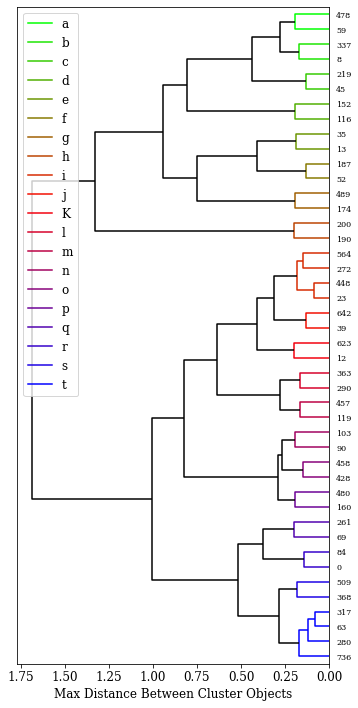

In [11]:
''' PLOT dist combine '''
METHOD = 'complete'

c_matrix_total_cc = c_corr_matrix_cc #+ 2*c_corr_diff_matrix_cc
# c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = np.sqrt(c_matrix_total_cc**2 + c_matrix_total_acg**2 + c_matrix_total_aco**2)
c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(5,10))

###
### PLOT
###
font = {'family' : 'serif',
		'weight' : 'normal',
		'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rcParams['mathtext.fontset']='dejavuserif'

cmap2 = plt.get_cmap('gist_stern')
cmap  = plt.get_cmap('brg')
fig = plt.figure(figsize=(5,10))

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.0, hspace=0.0)
plt.subplots_adjust(hspace=0.001)

ax0 = plt.subplot(gs[0,0])

n_col = np.linspace(0,1, num=20)
cmap_col = cmap(n_col)
# cmap_col = cmap_col.tolist
print(cmap_col)
# hac.set_link_color_palette(cmap_col)

# cmap = cm.rainbow(np.linspace(0, 1, 10))
hac.set_link_color_palette([matplotlib.colors.rgb2hex(rgb[:3]) for rgb in cmap_col])

dn = hac.dendrogram(links, labels=obj_analyze, color_threshold=0.2, orientation='left', above_threshold_color='k', ax=ax0)

# print(dn['color_list'])
LABELS = ['a','b','c','d','e','f','g','h','i','j','K','l','m','n','o','p','q','r','s','t']
LABELS = LABELS[::-1]
for ii in range(0,20):
	ax0.plot(-1,1,c=cmap_col[19-ii], label=LABELS[19-ii])
	
ax0.legend(loc='upper left')

ax0.set_xlabel(r'Max Distance Between Cluster Objects')

plt.tight_layout()
plt.savefig('blah_plot_hac_corr_cc_'+METHOD+'_v2.pdf', dpi=400)


# c_matrix_total = (c_matrix_total_cc + c_matrix_total_acg + c_matrix_total_aco)
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure()#figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('blah_plot_hac_corr_cc+acg+aco_L1'+METHOD+'_v2.pdf', dpi=400)



In [12]:
# ''' PLOT dist combine '''
# c_matrix_total_cc = 2.*c_corr_tr_matrix_cc #+ c_dist_tr_matrix_cc
# c_matrix_total_acg = c_corr_tr_matrix_acg #+ c_dist_tr_matrix_acg
# c_matrix_total_aco = c_corr_tr_matrix_aco #+ c_dist_tr_matrix_aco

# c_matrix_total = np.sqrt(c_matrix_total_cc**2 + c_matrix_total_acg**2 + c_matrix_total_aco**2)
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('blah_plot_hac_corrtr_cc+acg+aco_L2'+METHOD+'_v2.pdf', dpi=400)


# c_matrix_total = c_matrix_total_cc + c_matrix_total_acg + c_matrix_total_aco
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('blah_plot_hac_corrtr_cc+acg+aco_L1'+METHOD+'_v2.pdf', dpi=400)



In [13]:
# ''' EXTRACT CLUSTERS '''

# c_matrix_total_cc = 2.*c_corr_tr_matrix_cc #+ c_dist_tr_matrix_cc
# c_matrix_total_acg = c_corr_tr_matrix_acg #+ c_dist_tr_matrix_acg
# c_matrix_total_aco = c_corr_tr_matrix_aco #+ c_dist_tr_matrix_aco

# c_matrix_total = c_matrix_total_cc + c_matrix_total_acg + c_matrix_total_aco
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)

# fc = hac.fcluster(links, t=14., criterion='distance')

# print(fc.max())
# print(fc)
# num_clusters = fc.max()
# outfile = 'hac_corrtr_cc+acg+aco_L1'+METHOD+'_'+str(num_clusters)+'clusters_v2.dat'
# np.savetxt(outfile, fc, fmt='%d')

In [14]:
# ''' PLOT dist combine '''
# METHOD = 'weighted'

# c_matrix_total_cc = c_corr_matrix_cc #+ 2*c_corr_diff_matrix_cc
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corr_cc_'+METHOD+'_v2.pdf', dpi=400)


# c_matrix_total_cc = c_corr_tr_matrix_cc #+ 2*c_corr_diff_matrix_cc
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corrtr_cc_'+METHOD+'_v2.pdf', dpi=400)


In [15]:
# ''' EXTRACT CLUSTERS '''
# METHOD = 'complete'

# c_matrix_total_cc = c_corr_tr_matrix_cc #+ c_dist_tr_matrix_cc
# # c_matrix_total_acg = c_corr_tr_matrix_acg #+ c_dist_tr_matrix_acg
# # c_matrix_total_aco = c_corr_tr_matrix_aco #+ c_dist_tr_matrix_aco

# # c_matrix_total = np.sqrt(c_matrix_total_cc**2 + c_matrix_total_acg**2 + c_matrix_total_aco**2)
# c_matrix_total = c_matrix_total_cc
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)

# fc = hac.fcluster(links, t=0.29, criterion='distance')

# print(fc.max())
# print(fc)
# num_clusters = fc.max()
# cluster_arr = np.arange(1,num_clusters+1)
# num_in_cluster = np.zeros(num_clusters).astype(np.int)
# for ii in range(0,num_clusters):
# 	num_in_cluster[ii] = np.sum(fc == cluster_arr[ii])

# print(num_in_cluster)
# ordered_num_in_cluster = np.argsort(num_in_cluster)
# print(num_in_cluster[ordered_num_in_cluster[-10:]])
# big_clusters = cluster_arr[ordered_num_in_cluster[-10:]]
# big_clusters = big_clusters[::-1]
# print(big_clusters)

# fc_out = np.zeros(len(fc)).astype(np.int) -1
# for ii in range(0,10):
# 	fc_out[fc == big_clusters[ii]] = ii
# print(fc_out)

# num_clusters=10
# outfile = 'hac_corr_cc_'+METHOD+'_'+str(num_clusters)+'clusters_v10.dat'
# np.savetxt(outfile, fc_out, fmt='%d')

In [16]:
# new_objects_to_analyze = obj_analyze[fc_out>-1]
# print(new_objects_to_analyze)
# np.savetxt('objects_to_analyze_reduced_'+METHOD+'_v10.dat', new_objects_to_analyze, fmt='%d')

In [17]:
# ''' PLOT dist combine '''
# METHOD = 'complete'

# c_matrix_total_cc = c_corr_matrix_cc_med + c_corr_diff_matrix_cc_med
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corr_cc+diff_med_'+METHOD+'_v2.pdf', dpi=400)


# c_matrix_total_cc = c_corr_tr_matrix_cc_med + c_corr_diff_matrix_cc_med
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corrtr_cc+diff_med_'+METHOD+'_v2.pdf', dpi=400)


In [18]:
# print(c_corr_diff_matrix_cc_med)